In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Load the dataset
file_path = '/content/parkinsons disease data.csv'
data = pd.read_csv(file_path)

# Preprocessing: Drop non-numeric columns
non_numeric_columns = data.select_dtypes(include=['object']).columns
data = data.drop(non_numeric_columns, axis=1)

# Separating features and target
X = data.iloc[:, :-1]  # Assuming last column is the target
y = data.iloc[:, -1]

# Convert continuous target to discrete classes
median_value = y.median()
y = (y > median_value).astype(int)  # Binary classification (0 or 1)

# Dispersion Ratio Feature Selection
def dispersion_ratio(X, y):
    selected_features = []
    for col in X.columns:
        unique_values = X[col].unique()
        if len(unique_values) > 1:
            dispersion = np.std(X[col]) / np.mean(X[col])
            selected_features.append((col, dispersion))
    selected_features = sorted(selected_features, key=lambda x: x[1], reverse=True)
    top_features = [feature[0] for feature in selected_features if feature[1] > 0.1]
    return X[top_features]

X_selected = dispersion_ratio(X, y)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "F1 Score": f1,
        "Confusion Matrix": cm
    }

# Save the results dictionary for graphing
results

{'Logistic Regression': {'Accuracy': 0.5641025641025641,
  'F1 Score': 0.5764309764309764,
  'Confusion Matrix': array([[ 8,  5],
         [12, 14]])},
 'Decision Tree': {'Accuracy': 0.6923076923076923,
  'F1 Score': 0.6923076923076923,
  'Confusion Matrix': array([[ 7,  6],
         [ 6, 20]])},
 'Random Forest': {'Accuracy': 0.7435897435897436,
  'F1 Score': 0.75,
  'Confusion Matrix': array([[10,  3],
         [ 7, 19]])},
 'Naive Bayes': {'Accuracy': 0.46153846153846156,
  'F1 Score': 0.46153846153846156,
  'Confusion Matrix': array([[ 9,  4],
         [17,  9]])},
 'SVM': {'Accuracy': 0.6153846153846154,
  'F1 Score': 0.6259437199725463,
  'Confusion Matrix': array([[ 8,  5],
         [10, 16]])},
 'KNN': {'Accuracy': 0.6666666666666666,
  'F1 Score': 0.6746400885935769,
  'Confusion Matrix': array([[11,  2],
         [11, 15]])}}

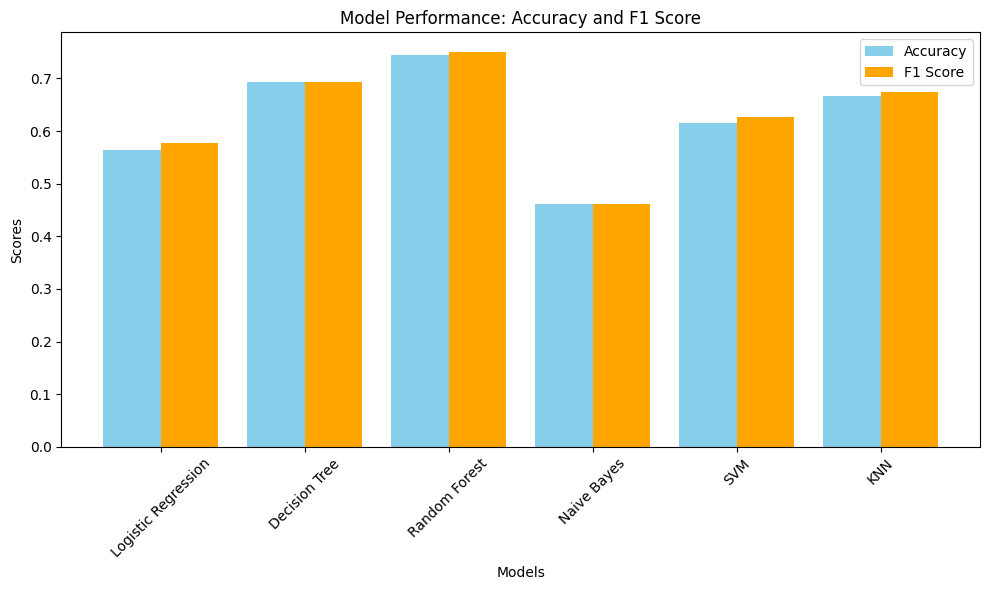

In [2]:
import matplotlib.pyplot as plt

# Function to plot Accuracy and F1 Scores
def plot_metrics(results):
    models = list(results.keys())
    accuracy = [results[model]["Accuracy"] for model in models]
    f1_scores = [results[model]["F1 Score"] for model in models]

    x = range(len(models))

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(x, accuracy, width=0.4, label='Accuracy', color='skyblue', align='center')
    plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', color='orange', align='center')

    plt.xticks([i + 0.2 for i in x], models, rotation=45)
    plt.xlabel("Models")
    plt.ylabel("Scores")
    plt.title("Model Performance: Accuracy and F1 Score")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Call the function with the `results` dictionary obtained from the first script
plot_metrics(results)
